## Initialization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [3]:
#load the data
labels = pd.read_csv('/datasets/faces/labels.csv')
print(labels.head())

    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17


## EDA

In [4]:
#I'll use the describe function to get a better understanding of the dataset

print(labels['real_age'].describe())

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


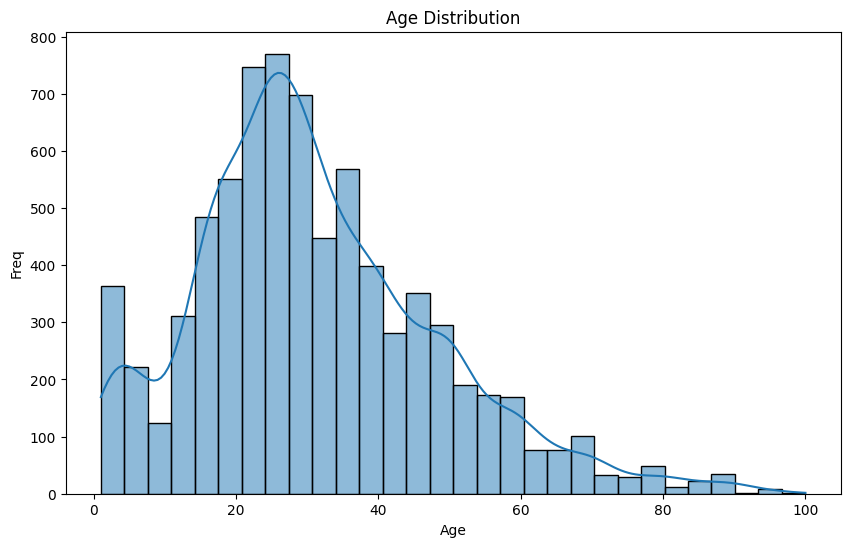

In [5]:
#I'll create a graph to show the age distribution and the frequency to see the range of ages of the people in the pictures

plt.figure(figsize=(10,6))
sns.histplot(labels['real_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

In [6]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

datagen_flow = datagen.flow_from_directory('/datasets/faces/',
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='sparse',
                                          seed=12345,
                                          )

Found 7591 images belonging to 1 classes.


In [7]:
train_datagen_flow = datagen.flow_from_directory('/datasets/faces/',
                                                 target_size=(150,150),
                                                 batch_size=16,
                                                 class_mode='sparse',
                                                 subset='training',
                                                 seed=12345,)

val_datagen_flow = datagen.flow_from_directory('/datasets/faces',
                                               target_size=(150,150),
                                               batch_size=16,
                                               class_mode='sparse',
                                               subset='validation',
                                               seed=12345,)

Found 5694 images belonging to 1 classes.
Found 1897 images belonging to 1 classes.


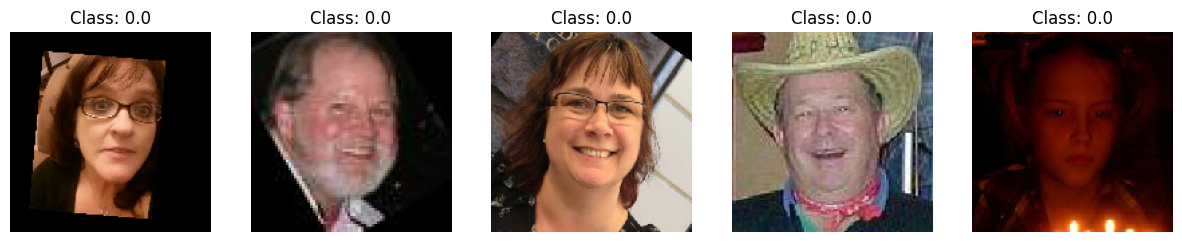

In [9]:
def display_sample_images(generator, num_samples=5):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(15,10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x_batch[i])
        plt.title(f"Class: {y_batch[i]}")
        plt.axis('off')
    plt.show()
    
display_sample_images(train_datagen_flow, num_samples=5)

### Findings

The mean age of the people in the pictures is around 31, and coupled with the histogram, we can see a majority of the participants are within the 20 to 40 age range.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [10]:
def load_train(path, target_size=(150,150), batch_size=16, class_mode='sparse', seed=12345):
    
    """
    It loads the train part of dataset from path
    """
    
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_gen_flow = datagen.flow_from_directory(directory=path,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode=class_mode,
                                                subset='training',
                                                seed=seed)

    return train_gen_flow

In [11]:
def load_test(path, target_size=(150,150), batch_size=16, class_mode='sparse', seed=12345):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    test_gen_flow = datagen.flow_from_directory(directory=path,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode=class_mode,
                                                subset='validation',
                                                seed=seed)

    return test_gen_flow

In [12]:
def create_model(input_shape=(150, 150, 3), num_classes=1):
    
    """
    It defines the model
    """
    
    backbone = ResNet50(weights='imagenet',
                       input_shape=input_shape,
                       include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=num_classes, activation='relu'))
    
    model.compile(optimizer='adam',
                 loss='mean_squared_error',
                 metrics=['mae'])
    
    return model

In [13]:
def train_model(model, train_data, test_data, batch_size=16, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    
    history = model.fit(
        train_data,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=test_data,
        validation_steps=validation_steps,
        verbose=1

    return model, history

SyntaxError: invalid syntax (3262776684.py, line 21)

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [ ]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.


Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921

Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035

Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454

Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481

Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192

Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332

Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359

Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239

Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529

Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629

Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866

Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591

Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467

Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401

Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841

Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304

Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419

Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226

Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908

Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

## Conclusions

With an MAE around 7, that would suggest that on average, the predicted ages of the people in the pictures are off by about 7 years. This level of accuracy may not be good enough for age verification. It could very easily identify someone much younger than they really are, or much older than they really are. For a store that sells alcohol, the model would have to be much more accurate simply for legal purposes.

Some cases that this model's MAE of 7 would be appropriate for could be something like a social media filter that guesses the age of the user. Another use could be for some sort of demographic study where an approximate age would be good enough to understand the age distribution of a population.